## Task 2: Penguin Species Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this assignment, you will be using the "Penguin" dataset. This dataset contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. The dataset consists of 7 columns, 3 of them contain categorical features and 4 of them numerical features:

* species: penguin species (Chinstrap, Adélie, or Gentoo)

* culmen_length_mm: culmen length (mm)

* culmen_depth_mm: culmen depth (mm)

* flipper_length_mm: flipper length (mm)

* body_mass_g: body mass (g)

* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

* sex: penguin sex

The task is to predict the species (target) using the featues above and a number of different machine learning algorithm (KNN classifier, support vector machine, decision tree classifier, and random forrest classifier). 

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

![Penguin](culmen.png)

<center>Source: https://allisonhorst.github.io/palmerpenguins/</center>

This assessed task is worth 10 marks and consists of 16 tasks. For each task, marks will be awarded for the output and for the quality of code (the code does what it should; follows a consistent style, and is easy to understand).

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
datapath = '/content/drive/MyDrive/COMP8220/Task 2/data'
df = pd.read_csv(os.path.join(datapath, 'penguins_size.csv'))

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Handling Missing Data

***Task 1:*** Detect and summarise all missing values and display them as illustrated below. [0.25 mark]

In [6]:
# Your code goes here. 
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

***Task 2:*** Replace missing values by the median in the case of numerical features and by the mode in the case of categorical features, and then display again the summary of missing values as illustrated below. [1 mark]

In [7]:
# Your code goes here. 
# replace missing values by the median for numerical features
df["culmen_length_mm"].fillna(df["culmen_length_mm"].median(), inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].median(), inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].median(), inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].median(), inplace=True)
#replace missing values by the mode for categorical features
df["sex"].fillna(df["sex"].mode()[0], inplace=True) # see Note for Myself

# check for na value again
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

*Note for Myself: There could be multiple modes in a column of data, therefore **mode()** by default returns a series of mode(s) in sorted order even if there is only one mode. **[0]** is to indicate the first mode in the series, and in the case of only one mode is returned, **mode()[0]** refers to the mode of the data.*

## Analyzing the Data

***Task 3:*** Display the pairwise correlation of all columns in the dataframe. [0.25 mark]

In [8]:
# Your code goes here.
corr = df.corr()
corr

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


***Task 4:*** Generated a heatmap using the seaborn library that displays the pairwise correlation visually. [0.5 mark]

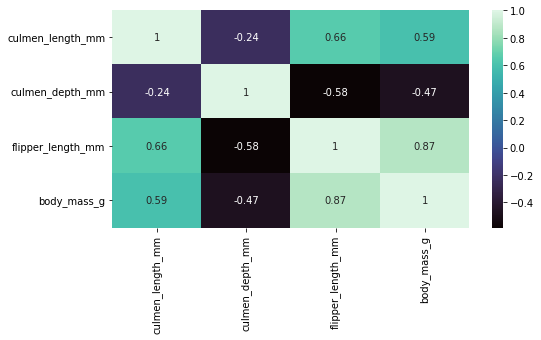

In [9]:
# Your code goes here.
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap="mako")
plt.show()

***Task 5:*** Produce a scatter plot that shows the relationship between body mass and flipper length as illustrated below. [0.5 mark]

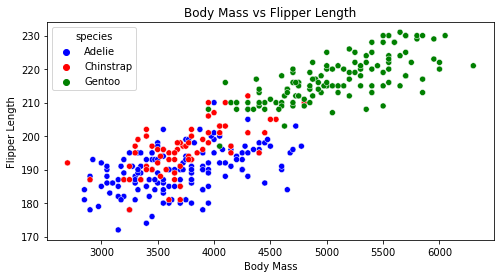

In [10]:
# Your code goes here.
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='body_mass_g', y='flipper_length_mm', hue='species', palette=['blue','red','green'])
plt.title("Body Mass vs Flipper Length")
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")
plt.show()

***Task 6:*** Display value counts for the species, island and sex. [0.75 mark]

In [11]:
# Your code goes here.
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [12]:
# Your code goes here.
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [13]:
# Your code goes here. 
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

***Task 7:*** Explore where the full stop comes from, display the corresponding row, replace the full stop by 'FEMALE', and then display the modified row again. [0.25 mark]

In [14]:
# Your code goes here.
df.loc[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
# Your code goes here.
df['sex']=df['sex'].replace(['.'],'FEMALE')
df.loc[[336]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE


***Task 8:*** Apply one hot encoding to the categorical features 'sex' and 'island' and display the head of the resulting dataframe as illustrated below. [0.5 mark] 

In [16]:
# Your code goes here. 
# use 'pd.get_dummies' to apply one hot encoding
encoded_df = pd.get_dummies(df, columns=['sex', 'island'])
encoded_df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.10,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.50,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.30,18.0,195.0,3250.0,1,0,0,0,1
3,Adelie,44.45,17.3,197.0,4050.0,0,1,0,0,1
4,Adelie,36.70,19.3,193.0,3450.0,1,0,0,0,1


***Task 9:*** Use value encoding ({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}) for the target variable ('species') and display the resulting dataframe as displayed below. [0.5 mark]

In [17]:
# Your code goes here. 

# convert 'species' to a category type
encoded_df["species"] = encoded_df["species"].astype('category')
encoded_df.dtypes

species              category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex_FEMALE              uint8
sex_MALE                uint8
island_Biscoe           uint8
island_Dream            uint8
island_Torgersen        uint8
dtype: object

In [18]:
# Your code goes here. 

# apply label encoding
encoded_df["species"] = encoded_df["species"].cat.codes
encoded_df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10,18.7,181.0,3750.0,0,1,0,0,1
1,0,39.50,17.4,186.0,3800.0,1,0,0,0,1
2,0,40.30,18.0,195.0,3250.0,1,0,0,0,1
3,0,44.45,17.3,197.0,4050.0,0,1,0,0,1
4,0,36.70,19.3,193.0,3450.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,2,44.45,17.3,197.0,4050.0,0,1,1,0,0
340,2,46.80,14.3,215.0,4850.0,1,0,1,0,0
341,2,50.40,15.7,222.0,5750.0,0,1,1,0,0
342,2,45.20,14.8,212.0,5200.0,1,0,1,0,0


## Machine Learning Algorithms

***Task 10:*** Use the train_test_split function of the sklearn library and split the independent variables and the target variable ('species') into a training set (80%) and into a test set (20%) and use random_state = 0 to make the solution reproducible. [0.5 mark]

In [19]:
# Your code goes here.

from sklearn.model_selection import train_test_split
# set independent variables (X) and target variable (y)
X = encoded_df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex_FEMALE','sex_MALE','island_Biscoe','island_Dream','island_Torgersen']]
y = encoded_df['species']
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

***Task 11:*** Use the KNeighborsClassifier (n_neighbors = 6) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [20]:
# Your code goes here.

# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# fit the model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# make prediction
y_pred_knn = knn.predict(X_test)

# display the accuracy score
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN model: {acc_knn*100}')

Accuracy for KNN model: 76.81159420289855


***Task 12:*** Use GridSearchCV function (with cv = 5) of the sklearn library and find the best value for the neighbors in the range from 1 to 20 for the KNeighborsClassifier and display the best value. [0.5 mark]

In [21]:
# Your code goes here.

# import library
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched (from 1 to 20)
k_range = list(range(1, 21))
#print(k_range)

# create a parameter grid: 
# map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
#print(param_grid)

# create the grid 
# (model used is knn, in range from 1-20 is set in param_grid, 5-fold cross validation, accuracy as the evaluation metric)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid with data
grid.fit(X, y)

# display the best parameter
print(f'gridsearch result: {grid.best_params_}')

gridsearch result: {'n_neighbors': 1}


***Task 13:*** Use the SVC() classifier (with the parameters: kernel='poly', random_state=0), fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [22]:
# Your code goes here.

# import library
from sklearn.svm import SVC

# fit the model
svc = SVC(kernel='poly', random_state=0)
svc.fit(X_train, y_train)

# make prediction
y_pred_svc = svc.predict(X_test)

# display the accuracy score
acc_svc = accuracy_score(y_test, y_pred_svc)
print(f'Model accuracy for SVC: {acc_svc*100}')

Model accuracy for SVC: 76.81159420289855


***Task 14:*** Use the DecisionTreeClassifier (with the parameter: random_state=0) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [23]:
# Your code goes here.

# import library
from sklearn.tree import DecisionTreeClassifier

# fit the model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# make prediction
y_pred_tree = tree.predict(X_test)

# display the accuracy score
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f'Model accuracy for decision tree: {acc_tree*100}')

Model accuracy for decision tree: 98.55072463768117


***Task 15:*** Use the RadomForestClassifier (with the parameter: random_state=0) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [24]:
# Your code goes here. 

# import library
from sklearn.ensemble import RandomForestClassifier

# fit the model
rndf = RandomForestClassifier(random_state=0)
rndf.fit(X_train, y_train)

# make prediction
y_pred_rndf = rndf.predict(X_test)

# display the accuracy score
acc_rndf = accuracy_score(y_test, y_pred_rndf)
print(f'Accuracy for RandomForestClassifier: {acc_rndf*100}')

Accuracy for RandomForestClassifier: 100.0


***Task 16***: Now use the StandardScaler of the sklearn library and scale the independent variables and run the tasks 10-15 again. Describe in a "markdown" cell in no more than 150 words what different results you observe. [2.5 marks]

In [25]:
# Your code goes here.

# import library
from sklearn.preprocessing import StandardScaler

# scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.88762183,  0.78728939, -1.4205409 , ..., -0.97700842,
        -0.75075719,  2.36968028],
       [-0.8140366 ,  0.12611415, -1.06348546, ..., -0.97700842,
        -0.75075719,  2.36968028],
       [-0.66686614,  0.43127195, -0.42078568, ..., -0.97700842,
        -0.75075719,  2.36968028],
       ...,
       [ 1.1911609 , -0.73849962,  1.50731367, ...,  1.02353263,
        -0.75075719, -0.42199786],
       [ 0.23455292, -1.19623632,  0.7932028 , ...,  1.02353263,
        -0.75075719, -0.42199786],
       [ 1.09917936, -0.53506109,  0.86461389, ...,  1.02353263,
        -0.75075719, -0.42199786]])

In [26]:
# Your code goes here.
# run the tasks 10-15 again

# task 10: split the data
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

# task 11: knn
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_scaled_train, y_train)
y_pred_knn2 = knn.predict(X_scaled_test)
acc_knn2 = accuracy_score(y_test, y_pred_knn2)
print(f'Accuracy for KNN model: {acc_knn2*100}')

# task 12: gridsearch CV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)
print(f'gridsearch result: {grid.best_params_}')

# task 13: svc
svc = SVC()
svc.fit(X_scaled_train, y_train)
y_pred_svc2 = svc.predict(X_scaled_test)
acc_svc2 = accuracy_score(y_test, y_pred_svc2)
print(f'Model accuracy for SVC: {acc_svc2*100}')

# task 14: decision tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_scaled_train, y_train)
y_pred_tree2 = tree.predict(X_scaled_test)
acc_tree2 = accuracy_score(y_test, y_pred_tree2)
print(f'Model accuracy for decision tree: {acc_tree2*100}')

# task 15: random forest
rndf = RandomForestClassifier(random_state=0)
rndf.fit(X_scaled_train, y_train)
y_pred_rndf2 = rndf.predict(X_scaled_test)
acc_rndf2 = accuracy_score(y_test, y_pred_rndf2)
print(f'Accuracy for RandomForestClassifier: {acc_rndf2*100}')

Accuracy for KNN model: 98.55072463768117
gridsearch result: {'n_neighbors': 10}
Model accuracy for SVC: 98.55072463768117
Model accuracy for decision tree: 98.55072463768117
Accuracy for RandomForestClassifier: 100.0


### Observations:

Below is a table summarizes the accuracy scores and results of the model predictions using different classifiers before and after scaling independent variables (X).

|                        |         Result | Result (Scaled X) |
|------------------------|---------------:|------------------:|
| KNeighborsClassifier   |          76.81% |             98.55% |
| GridSearchCV           | best value = 1 |   best value = 10 |
| SVC() classifier       |          76.81% |             98.55% |
| DecisionTreeClassifier |          98.55% |             98.55% |
| RandomForestClassifier  |            100% |               100% |

- The accuracy scores improved for both KNeighborsClassifier and SVC() classifier from 76.81% to 98.55% when scaled independent variables are used in model predictions. 
- The grid search result indicated the best value of neighbors in KNeighborsClassifier changed from 1 to 10 after scaling X. 
- Whereas, the accuracy scores for both DecisionTreeClassifier (98.55%) and RandomForestClassifier (100%) remained unchanged.
- Increased in accuracy scores for nearly 22% indicates performance largely improved with scaled independent variables.
- All classifiers except for RandomForestClassifier achieved the same accuracy socre (98.55%) when using scaled independent variables.
- 100% accuracy score in RandomForestClassifier indicates problem of overfitting. Tried to reduce the risk of overfitting by restricting the maximum depth=2 in RandomForestClassifier achieved the same result (98.55%) as the others (see coding below).





In [27]:
# restrict the maximum depth=2 in RandomForestClassifier
rndf = RandomForestClassifier(random_state=0, max_depth=2)
rndf.fit(X_scaled_train, y_train)
y_pred_rndf2 = rndf.predict(X_scaled_test)
acc_rndf2 = accuracy_score(y_test, y_pred_rndf2)
print(f'Accuracy for RandomForestClassifier: {acc_rndf2*100}')

Accuracy for RandomForestClassifier: 98.55072463768117
